  # Random Forest 

In [34]:
# import numpy as np
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Copy of glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [5]:
df.shape

(999, 10)

In [6]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.duplicated().sum()

np.int64(785)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
print(f'shape of dataset :{df.shape}')

shape of dataset :(214, 10)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    float64
dtypes: float64(10)
memory usage: 18.4 KB


In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df[df.duplicated]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [13]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0,7.0


In [14]:
df.isnull().sum()

RI      1
Na      1
Mg      1
Al      1
Si      1
K       1
Ca      1
Ba      1
Fe      1
Type    1
dtype: int64

In [15]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [16]:
df.drop([214],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    float64
dtypes: float64(10)
memory usage: 18.3 KB


In [18]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [20]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [21]:
if duplicate_count > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])

In [22]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"\nNumber of duplicate rows after dropping: {df.duplicated().sum()}")


Number of duplicate rows after dropping: 0


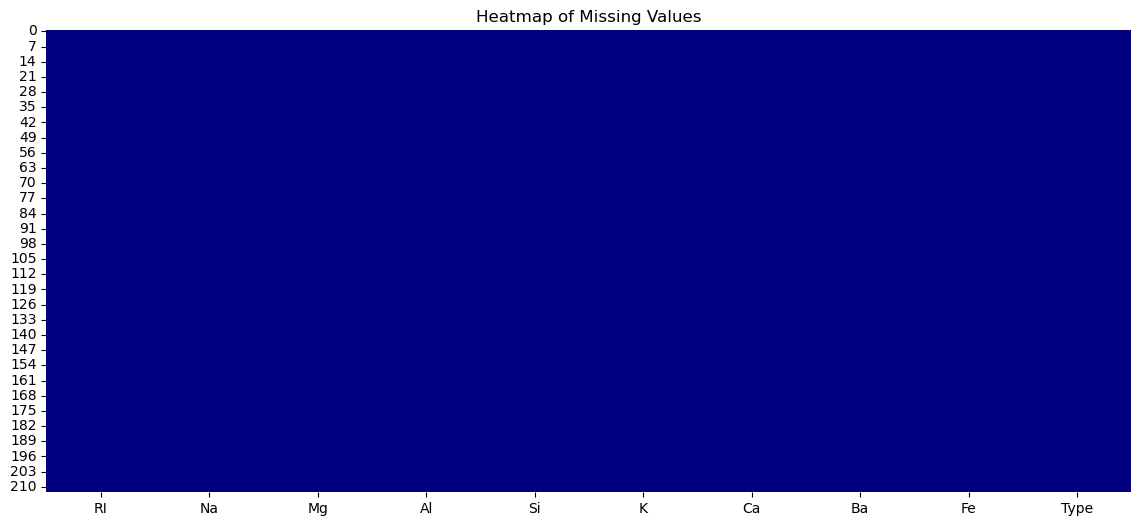

In [23]:
colours = sns.color_palette(["navy", "yellow"])
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cmap=colours, cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [24]:
# Unique values in each column
print("\nNumber of unique values in each column:")
for col in df:
    print(f"{col}: {df[col].nunique()}")


Number of unique values in each column:
RI: 178
Na: 142
Mg: 94
Al: 118
Si: 133
K: 65
Ca: 143
Ba: 34
Fe: 32
Type: 6


In [25]:
# Display unique values in each column
print("\nUnique values in each column:")
for col in df:
    print(f"{col}: {df[col].unique()}")


Unique values in each column:
RI: [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169 

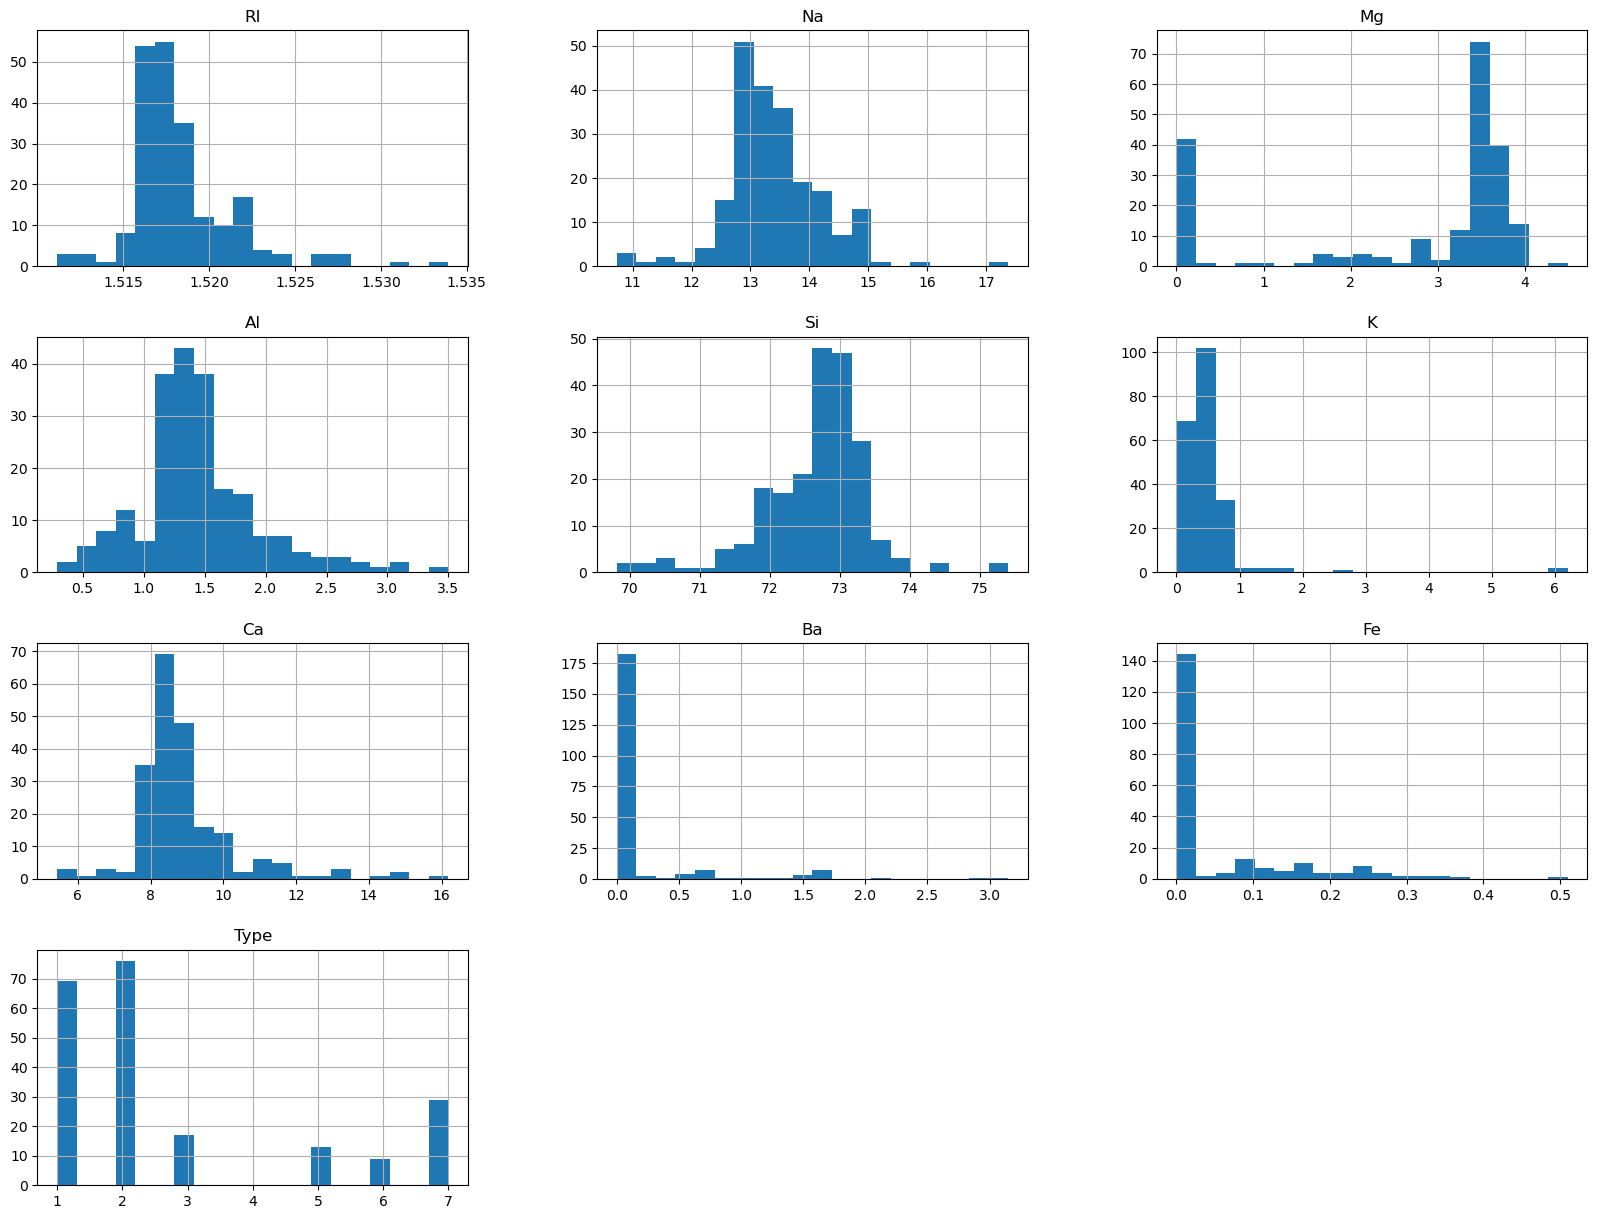

In [26]:
# Visualizations
# Distribution of each feature
df.hist(bins=20, figsize=(20, 15))
plt.show()

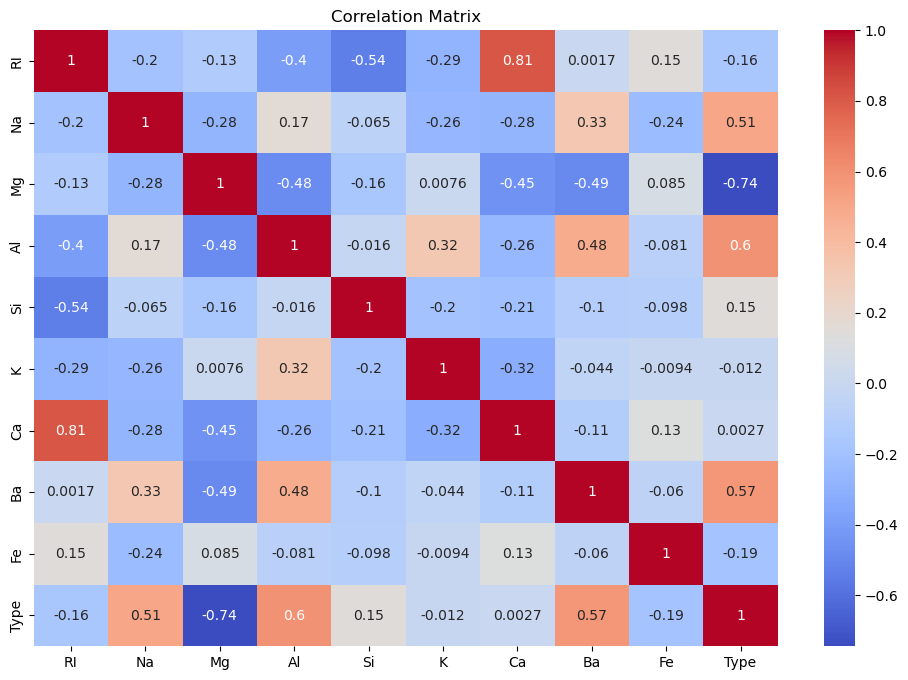

In [27]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

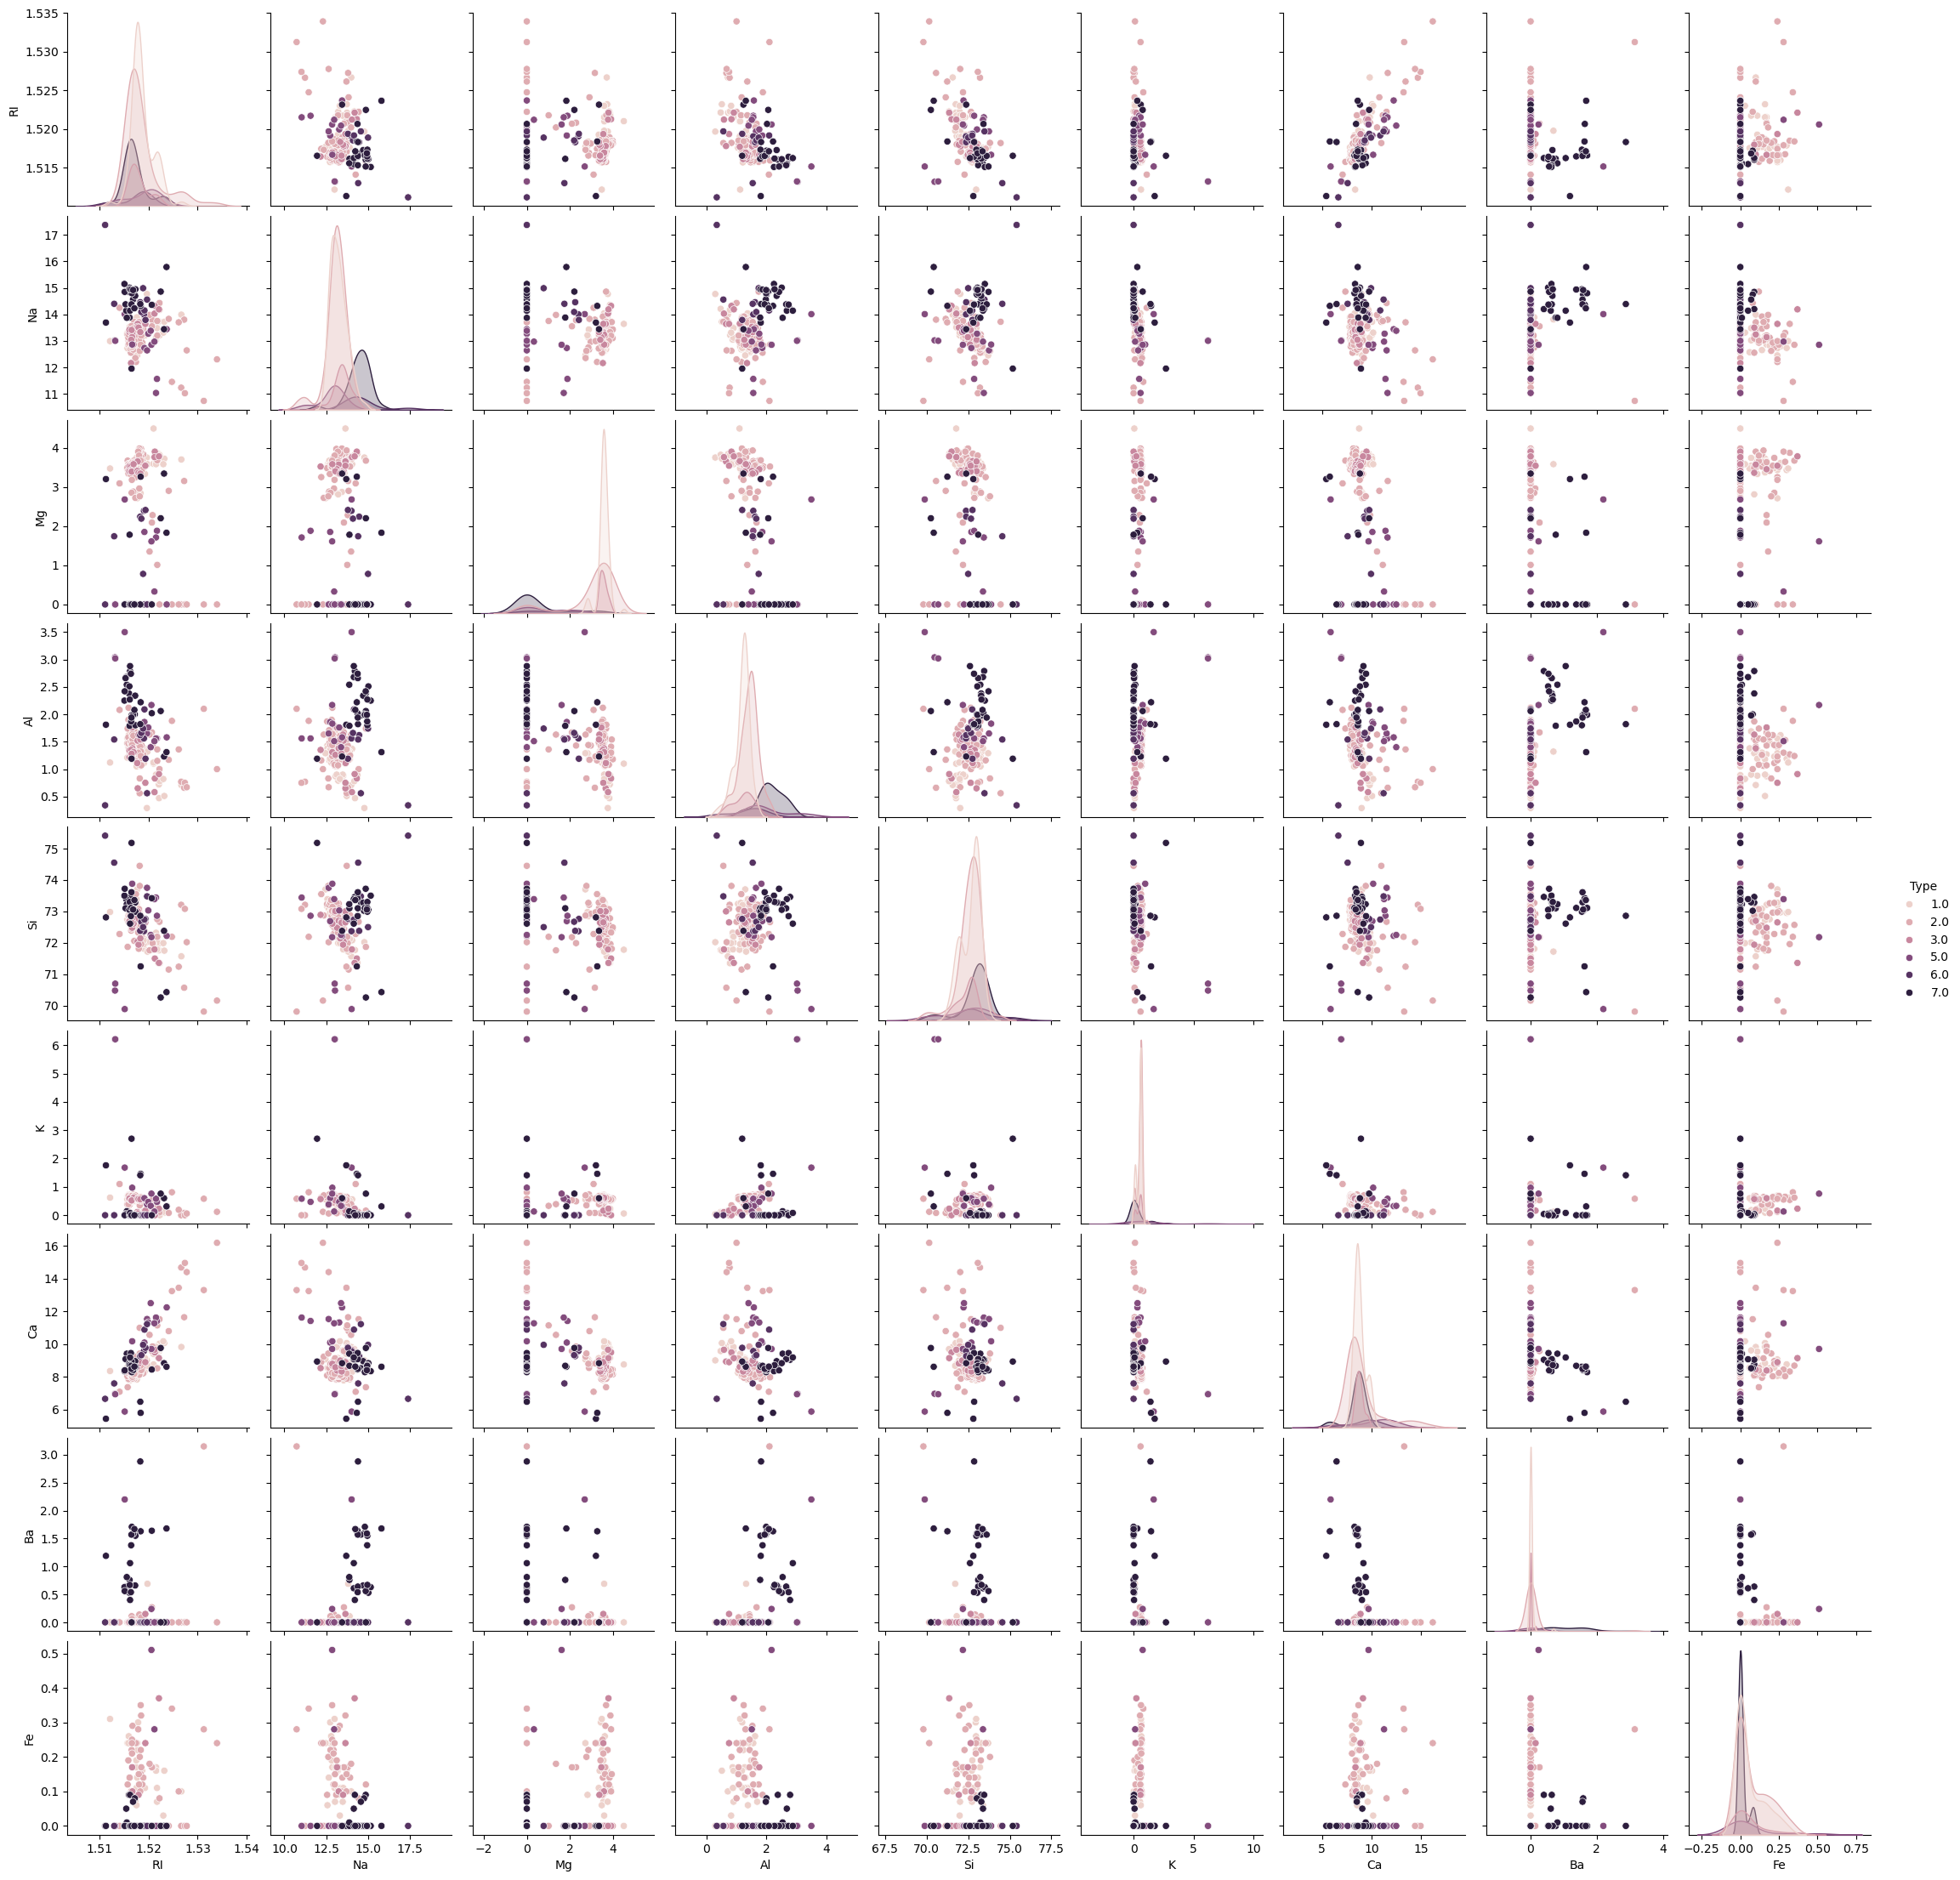

In [28]:
# Pairplot to visualize pairwise relationships
sns.pairplot(df, hue='Type')
plt.show()

In [29]:
# Split the data into features and target
X = df.drop('Type', axis=1)
y = df['Type']

In [30]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [36]:
# Define classifiers
rf = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

In [37]:
# Train and evaluate classifiers
for clf, name in zip([rf, bagging, adaboost], ['Random Forest', 'Bagging', 'AdaBoost']):
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classifier Report:\n")
    print(classification_report(y_test, y_pred))


Random Forest Classifier Report:

              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86        14
         2.0       0.83      0.67      0.74        15
         3.0       0.60      1.00      0.75         3
         5.0       0.75      1.00      0.86         3
         6.0       0.67      1.00      0.80         2
         7.0       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.78      0.89      0.82        43
weighted avg       0.83      0.81      0.81        43


Bagging Classifier Report:

              precision    recall  f1-score   support

         1.0       0.90      0.64      0.75        14
         2.0       0.73      0.73      0.73        15
         3.0       0.43      1.00      0.60         3
         5.0       1.00      1.00      1.00         3
         6.0       0.67      1.00      0.80         2
         7.0       1.00      0.83      0.91         6

    accuracy 

In [38]:
# Cross-validation scores
print("\nCross-validation scores:")
for clf, name in zip([rf, bagging, adaboost], ['Random Forest', 'Bagging', 'AdaBoost']):
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    print(f"{name}: {scores.mean():.3f} ± {scores.std():.3f}")


Cross-validation scores:
Random Forest: 0.700 ± 0.064
Bagging: 0.671 ± 0.044
AdaBoost: 0.431 ± 0.163


## Conclusion : 

- The glass dataset was analyzed, revealing no missing values but some duplicate rows, which were removed.
- Correlation analysis showed moderate correlations between features, indicating potential multicollinearity.
- Class imbalance was addressed using SMOTE.
- Three ensemble models (Random Forest, Bagging, AdaBoost) were trained and evaluated.
- The models showed consistent performance, making them effective for glass type classification.